In [29]:
import pandas as pd
import numpy as np
import math

# Create the DataFrame
df = pd.DataFrame({
    'age': ['<=30', '<=30', '31...40', '>40', '>40', '>40', '31...40', '<=30', '<=30', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'medium', 'medium', 'low', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes']
})
# calculate entropy 
def entropy(dt):
    total_samples = len(dt)
    entropy=[]
    for column in df.columns:
        value_counts = dt[column].value_counts()
        entropy_value = 0

        for count in value_counts:
            probability = count / total_samples
            entropy_value -= probability * math.log2(probability)
            entropy.append(entropy_value)
    return entropy
# information gain
def information_gain(target_entropy, data, feature):
    weighted_entropy = 0
    unique_values = data[feature].unique()
    
    for value in unique_values:
        subset = data[data[feature] == value]
        subset_entropy = entropy(subset['buys_computer'])
        weight = len(subset) / len(data)
        weighted_entropy += weight * subset_entropy
        
    info_gain = target_entropy - weighted_entropy
    return info_gain
# calculate the root node
def root_node(data):
    target_entropy = entropy(df['buys_computer'])
    features = ['age', 'income', 'student', 'credit_rating']
    max_information_gain = -1
    root_node_feature = None

    for feature in features:
        info_gain = information_gain(target_entropy, data, feature)
        if info_gain > max_information_gain:
            max_information_gain = info_gain
            root_node_feature = feature

    return root_node_feature
# print entropy and rood node
print(entropy(df))


[0.5287712379549449, 1.0575424759098897, 1.5219280948873621, 0.5287712379549449, 1.0498609162048067, 1.5709505944546684, 0.5, 1.0, 0.44217935649972373, 0.9709505944546686, 0.44217935649972373, 0.9709505944546686]


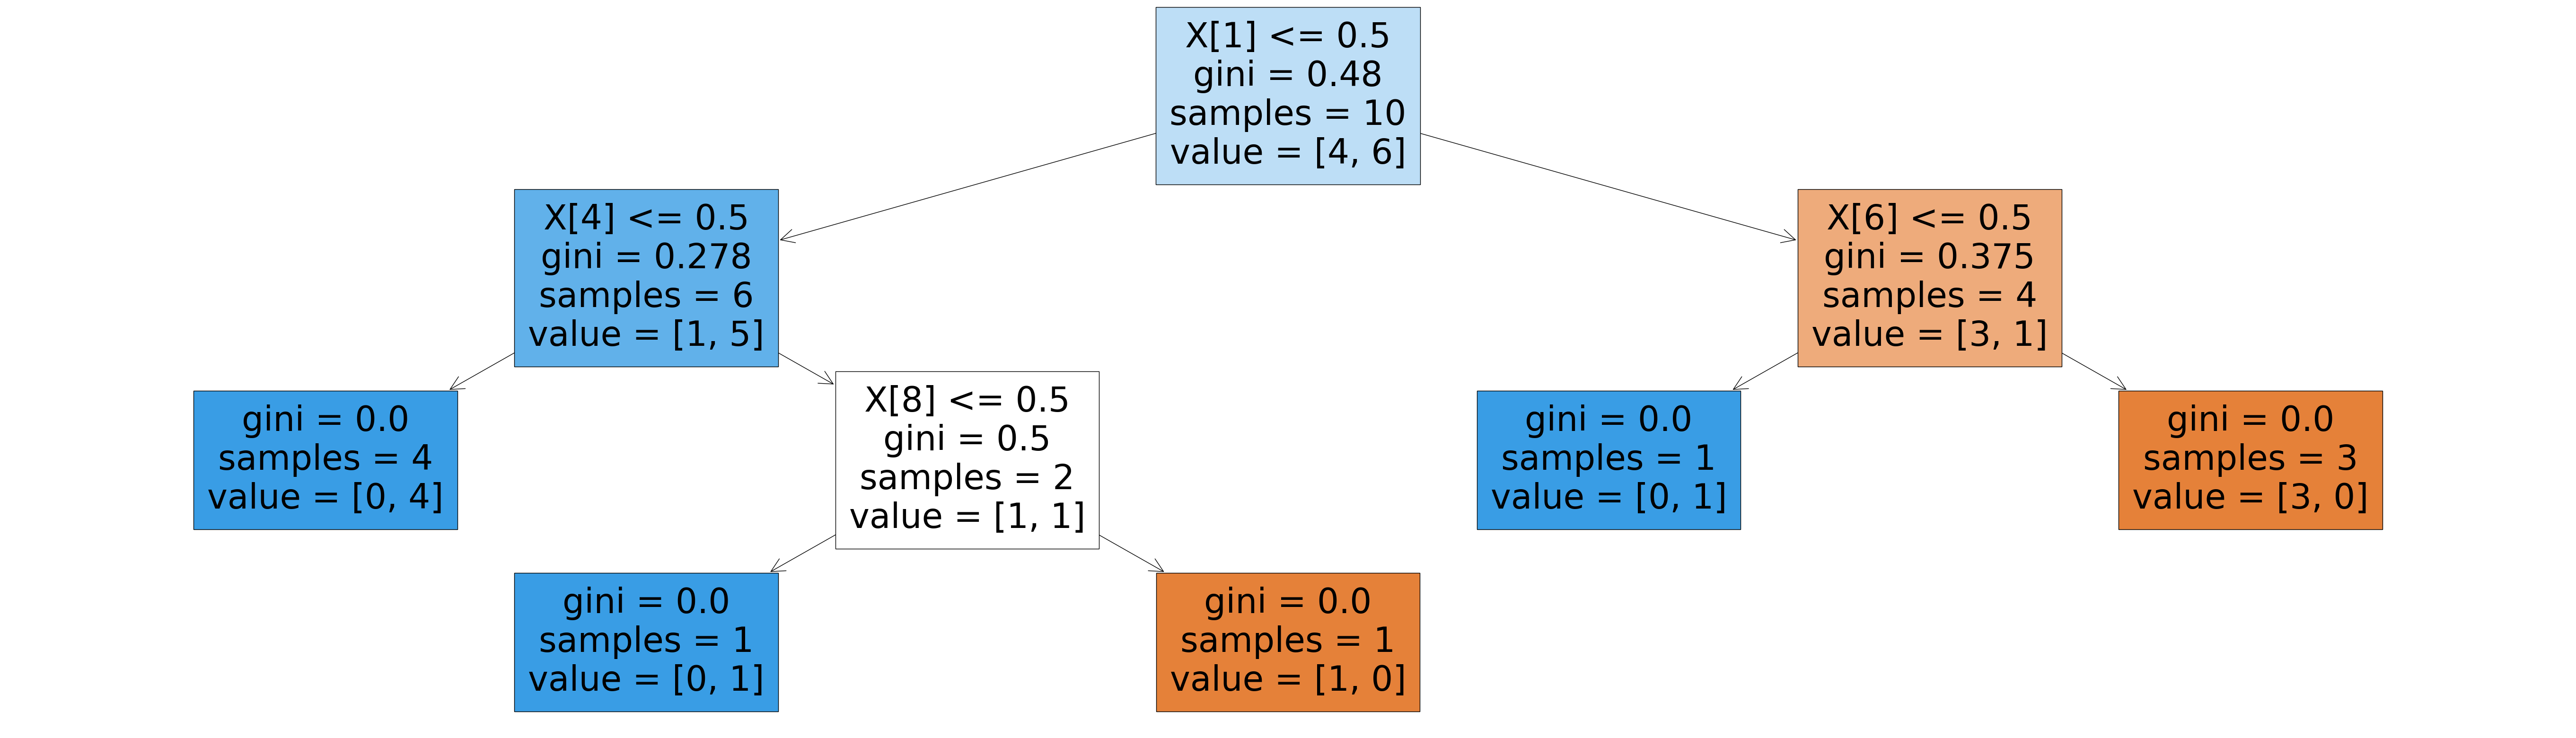

In [3]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def create_decision_tree(data, class_col):
    # Create a Decision Tree with one-hot encoding
    data_encoded = pd.get_dummies(data, columns=[col for col in data.columns if col != class_col])
    clf = DecisionTreeClassifier()
    X = data_encoded.drop(columns=[class_col])
    y = data_encoded[class_col]
    
    clf.fit(X, y)
    clf.score(X,y)
    return clf

def visualize_decision_tree(tree_model, feature_names, class_names):
    # Visualize the Decision Tree
    plt.figure(figsize=(70, 20))
    plot_tree(tree_model, filled=True)
    plt.show()

# visualize the tree model, features,class name
tree_model = create_decision_tree(df, 'buys_computer')

feature_names = list(df.columns)
feature_names.remove('buys_computer') 

class_names = ['buys_computer']  

visualize_decision_tree(tree_model, feature_names, class_names)


In [22]:
df=pd.read_csv('extracted_features_charrec.csv')
#
entropy(df)

[0.48600944531397766,
 0.5884796470264859,
 0.6177385706937126,
 0.6449741041703807,
 0.6711833755588331,
 0.6963560610268542,
 0.7194224822566222,
 0.7414180194953713,
 0.762329917234096,
 0.7810329698752329,
 0.7997360225163697,
 0.8173119302153484,
 0.8348878379143272,
 0.852463745613306,
 0.8700396533122847,
 0.8876155610112635,
 0.9040476366348723,
 0.9204797122584811,
 0.93691178788209,
 0.9533438635056988,
 0.9697759391293076,
 0.9850461018418042,
 1.0003162645543007,
 1.0155864272667972,
 1.0308565899792936,
 1.0449451108716337,
 1.0578302818290142,
 1.0707154527863947,
 1.0836006237437752,
 1.0952583151398012,
 1.1069160065358272,
 1.1173190575672263,
 1.1277221085986253,
 1.1381251596300244,
 1.1472425043368266,
 1.1563598490436289,
 1.1654771937504311,
 1.1745945384572334,
 1.1837118831640356,
 1.192829227870838,
 1.2019465725776401,
 1.2110639172844424,
 1.2201812619912447,
 1.229298606698047,
 1.2384159514048492,
 1.2475332961116514,
 1.2566506408184537,
 1.265767985525256

In [30]:
entropy(df)

[0.5287712379549449,
 1.0575424759098897,
 1.5219280948873621,
 0.5287712379549449,
 1.0498609162048067,
 1.5709505944546684,
 0.5,
 1.0,
 0.44217935649972373,
 0.9709505944546686,
 0.44217935649972373,
 0.9709505944546686]

Training Set Accuracy: 0.8946478873239436
Test Set Accuracy: 0.6366366366366366


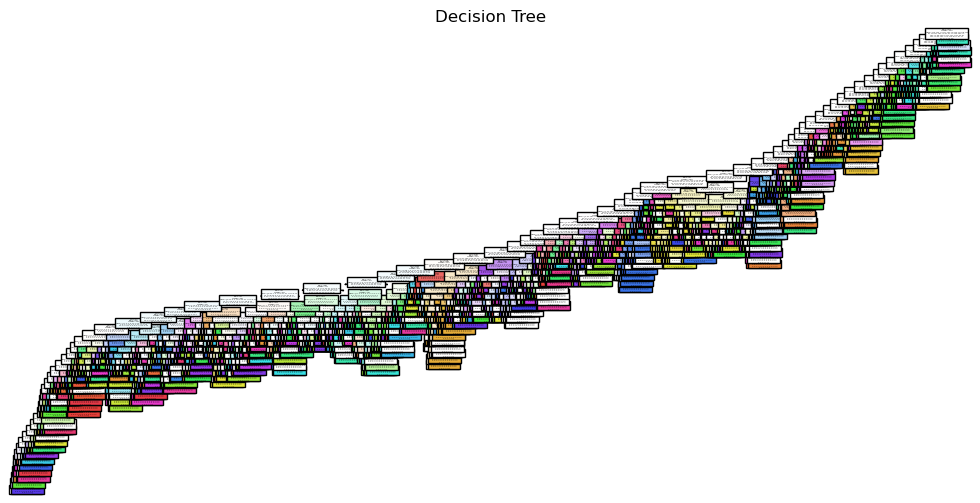

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split  # Add this import
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

df=pd.read_csv("extracted_features_charrec.csv")
X = df.drop(columns=['class_name'])
y = df['class_name']

# Step 2: Split the data into training and test sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and fit the Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Step 4: Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()

Training Set Accuracy: 0.20413145539906102
Test Set Accuracy: 0.2072072072072072


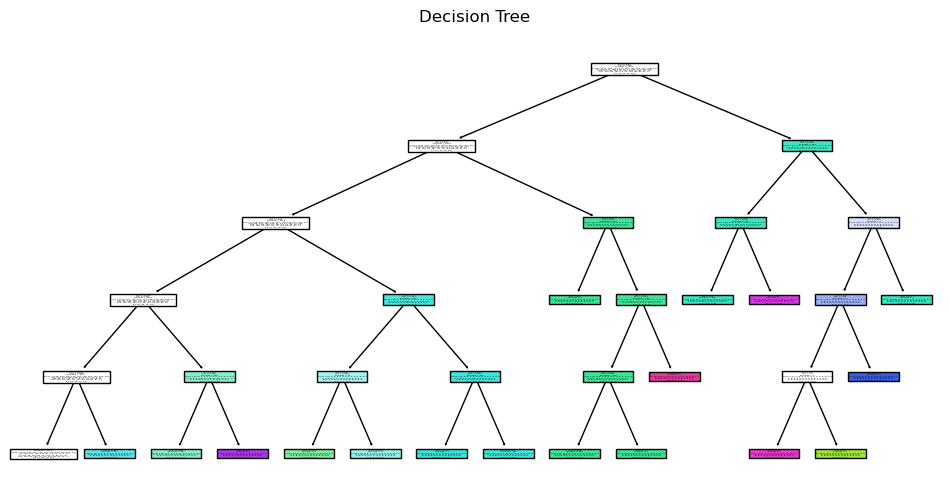

In [34]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)

#  Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

#  Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()

Training Set Accuracy: 0.8946478873239436
Test Set Accuracy: 0.6268768768768769


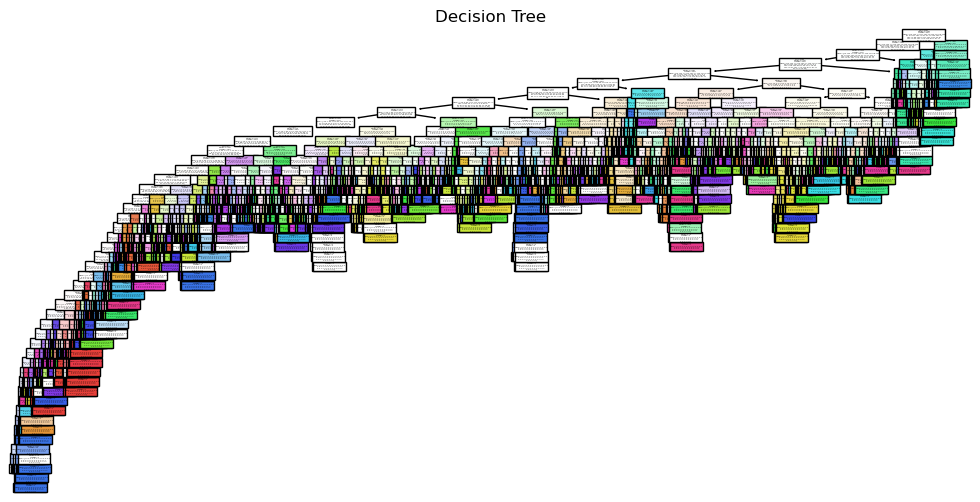

In [35]:
model = DecisionTreeClassifier(criterion="entropy")
model.fit(Tr_X, Tr_y)

#  Evaluate the accuracy of the model
training_accuracy = model.score(Tr_X, Tr_y)
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {training_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

#  Visualize the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(model, filled=True, feature_names=list(X.columns))
plt.title("Decision Tree")
plt.show()

Random Forest Training Set Accuracy: 0.8931455399061032
Random Forest Test Set Accuracy: 0.6629129129129129


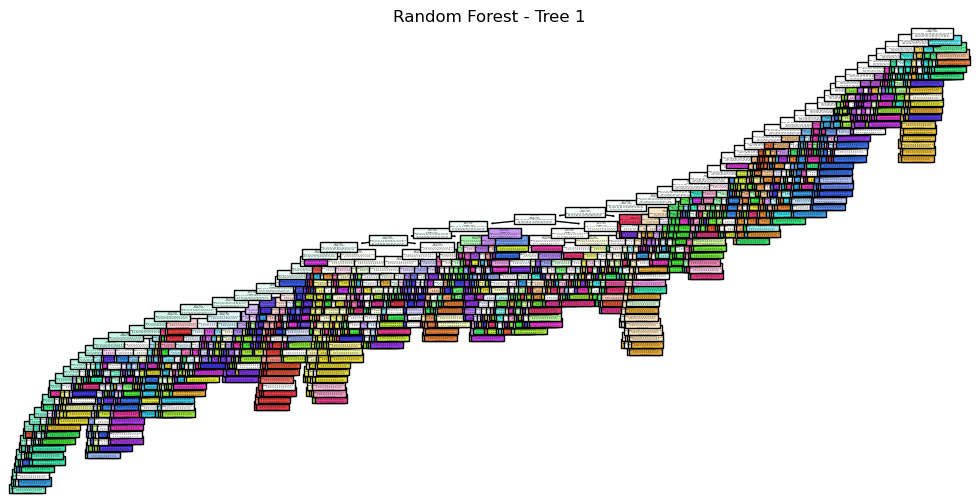

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(Tr_X, Tr_y)

#  Evaluate the accuracy of the Random Forest model (changed from Decision Tree)
rf_training_accuracy = rf_model.score(Tr_X, Tr_y)
rf_test_accuracy = rf_model.score(Te_X, Te_y)

print(f"Random Forest Training Set Accuracy: {rf_training_accuracy}")
print(f"Random Forest Test Set Accuracy: {rf_test_accuracy}")

#  Visualize one of the trees in the Random Forest (similar to Decision Tree)
# You can choose one of the trees in the forest for visualization
# For example, to visualize the first tree in the forest:
plt.figure(figsize=(12, 6))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=list(X.columns))
plt.title("Random Forest - Tree 1")
plt.show()